## LAS vs. DFT

In [1]:
%load_ext autoreload
%autoreload 2

from tools import bandh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tools.util import load_pkl, LASdata, PeriodicData, DMRGdata
sns.set()

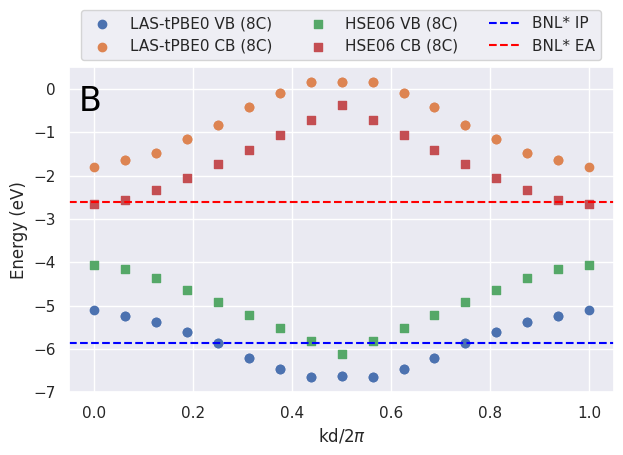

In [6]:
cpf = 4

las = LASdata(pkl_fn=f"logs/pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LAS-tPBE0 VB ({cpf*2}C)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LAS-tPBE0 CB ({cpf*2}C)")

fnal = "HSE06"
per = PeriodicData(f"logs/periodic_{fnal}_frag{cpf*2}C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB ({cpf*2}C)",marker="s")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB ({cpf*2}C)",marker="s")

plt.axhline(-5.87,linestyle="--",color="blue",label="BNL* IP")
plt.axhline(-2.60,linestyle="--",color="red",label="BNL* EA")

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.legend(bbox_to_anchor=(0.99,1.2),ncols=3)
plt.annotate("B",(-0.03,-0.5),c="black",size=24)
plt.tight_layout()
plt.savefig("figures/lastpbe0_hse06_comparison.png")

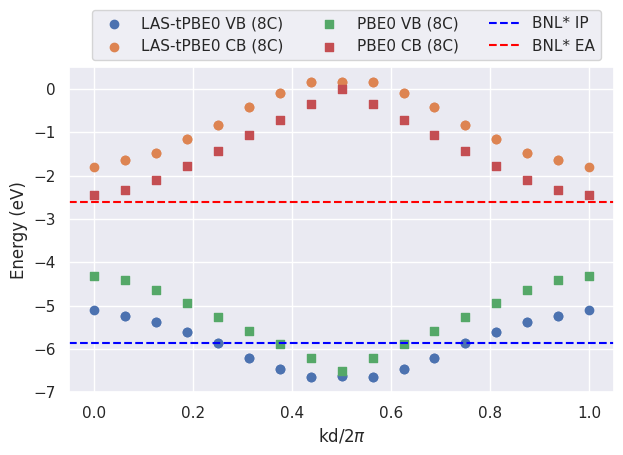

In [8]:
cpf = 4

las = LASdata(pkl_fn=f"logs/pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
e,k = las.get_homo()
plt.scatter(k,e,label=f"LAS-tPBE0 VB ({cpf*2}C)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"LAS-tPBE0 CB ({cpf*2}C)")

fnal = "PBE0"
per = PeriodicData(f"logs/periodic_{fnal}_frag{cpf*2}C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB ({cpf*2}C)",marker="s")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB ({cpf*2}C)",marker="s")

plt.axhline(-5.87,linestyle="--",color="blue",label="BNL* IP")
plt.axhline(-2.60,linestyle="--",color="red",label="BNL* EA")

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.legend(bbox_to_anchor=(0.99,1.2),ncols=3)
plt.tight_layout()
plt.savefig("figures/lastpbe0_hse06_comparison.png")

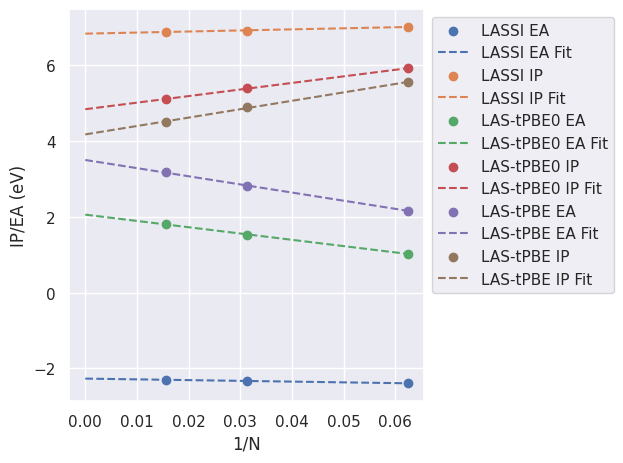

In [62]:
##Extrapolations
from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

def fit(x,y,plot=False,label="fit"):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(np.array(x)[:,None],np.array(y)[:,None])
    m, b = model.coef_[0], model.intercept_[0] 
    if plot:
        x = np.arange(0,x.max(),0.0001)
        y = m*x + b
        plt.plot(x,y,linestyle="--",label=label)
    return b

def extrap(col,pct_pdft=0,plot=True):
    df = pd.DataFrame()
    las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=pct_pdft)
    df.loc["LAS-PDFT (8C,16)","IP"] = las.ip()
    df.loc["LAS-PDFT (8C,16)","EA"] = las.ea()
    df.loc["LAS-PDFT (8C,16)","1/N"] = 1/16
    las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=pct_pdft)
    df.loc["LAS-PDFT (8C,32)","IP"] = las.ip()
    df.loc["LAS-PDFT (8C,32)","EA"] = las.ea()
    df.loc["LAS-PDFT (8C,32)","1/N"] = 1/32
    las = LASdata(pkl_fn="logs/pa64_frag4_dist24_lsipdft.pkl",pct_pdft=pct_pdft)
    df.loc["LAS-PDFT (8C,64)","IP"] = las.ip()
    df.loc["LAS-PDFT (8C,64)","EA"] = las.ea()
    df.loc["LAS-PDFT (8C,64)","1/N"] = 1/64
    if pct_pdft == 0:
        lab = "LASSI"
    elif pct_pdft == 0.75:
        lab = "LAS-tPBE0"
    elif pct_pdft == 1:
        lab = "LAS-tPBE"
    if plot:
        plt.scatter(df["1/N"],df[col],label=f"{lab} {col}")
    b = fit(df["1/N"],df[col],plot=plot,label=f"{lab} {col} Fit")
    if plot:
        plt.xlabel("1/N")
        plt.ylabel("IP/EA (eV)")
        plt.legend()
    return b

extrap("EA",pct_pdft=0)
extrap("IP",pct_pdft=0)
extrap("EA",pct_pdft=0.75)
extrap("IP",pct_pdft=0.75)
extrap("EA",pct_pdft=1)
extrap("IP",pct_pdft=1)
plt.legend(bbox_to_anchor=(1,1))
# plt.legend()
plt.tight_layout()
plt.savefig("figures/pa_extrap.png",dpi=500)

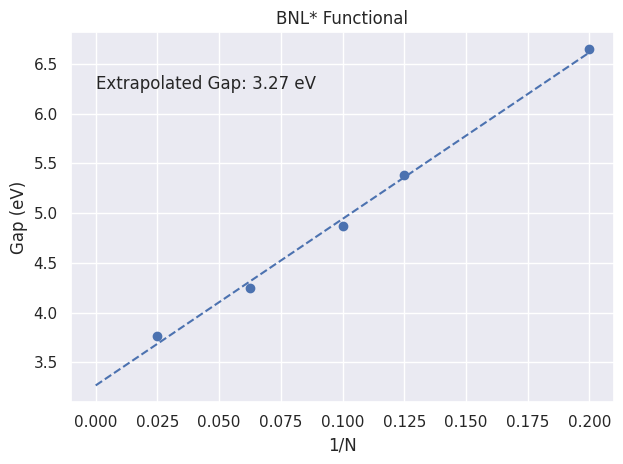

In [48]:
#Data Taken from SI of https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.186401
beginat = 3
x = 1/np.array([1,2,3,5,8,10,16,40])[beginat:]
y = np.array([11.02,9.48,8.41,6.65,5.38,4.87,4.25,3.77])[beginat:]
plt.scatter(x,y)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x[:,None],y[:,None])
m, b = model.coef_[0], model.intercept_[0] 
x = np.arange(0,x.max(),0.0001)
y = m*x + b
plt.plot(x,y,linestyle="--")
plt.xlabel("1/N")
plt.ylabel("Gap (eV)")
plt.title("BNL* Functional")
plt.annotate(f"Extrapolated Gap: {np.round(b,2)} eV",(0,6.25))
plt.tight_layout()
plt.savefig("figures/bnl_extrap.png",dpi=500)

## Adding Comparisons

In [7]:
from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

per = PeriodicData("logs/periodic_HF_frag2C_24_k16.csv")
df.loc["HF","IP"] = per.ip()
df.loc["HF","EA"] = per.ea()
per = PeriodicData("logs/periodic_PBE_frag2C_24_k16.csv")
df.loc["PBE","IP"] = per.ip()
df.loc["PBE","EA"] = per.ea()
per = PeriodicData("logs/periodic_HSE06_frag2C_24_k16.csv")
df.loc["HSE06","IP"] = per.ip()
df.loc["HSE06","EA"] = per.ea()
per = PeriodicData("logs/periodic_PBE0_frag2C_24_k16.csv")
df.loc["PBE0","IP"] = per.ip()
df.loc["PBE0","EA"] = per.ea()
# las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
# df.loc["LAS-tPBE0 (8C,16U)","IP"] = las.ip()
# df.loc["LAS-tPBE0 (8C,16U)","EA"] = las.ea()
# las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
# df.loc["LAS-tPBE0 (8C,32U)","IP"] = las.ip()
# df.loc["LAS-tPBE0 (8C,32U)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa64_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (8C,64)","IP"] = las.ip()
df.loc["LAS-tPBE0 (8C,64)","EA"] = las.ea()

#Extrap.
# df.loc["LASSI Extrap.","IP"] = extrap("IP",pct_pdft=0,plot=False)
# df.loc["LASSI Extrap.","EA"] = extrap("EA",pct_pdft=0,plot=False)

# #Extrap.
# df.loc["LAS-tPBE Extrap.","IP"] = extrap("IP",pct_pdft=1,plot=False)
# df.loc["LAS-tPBE Extrap.","EA"] = extrap("EA",pct_pdft=1,plot=False)

#Extrap.
df.loc["LAS-tPBE0 Extrap.","IP"] = extrap("IP",pct_pdft=0.75,plot=False)
df.loc["LAS-tPBE0 Extrap.","EA"] = extrap("EA",pct_pdft=0.75,plot=False)

#BNL*
df.loc["BNL*","IP"] = 5.87
df.loc["BNL*","EA"] = -(-5.87 + 3.27)

df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

,HF,PBE,HSE06,PBE0,"LAS-tPBE0 (8C,64)",LAS-tPBE0 Extrap.,BNL*
IP,5.68,3.73,4.08,4.38,5.10,4.84,5.87
EA,-0.79,2.85,2.65,2.37,1.81,2.06,2.60
GAP,6.47,0.89,1.44,2.01,3.30,2.78,3.27


In [8]:
print(df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    HF &   PBE &  HSE06 &  PBE0 &  LAS-tPBE0 (8C,64) &  LAS-tPBE0 Extrap. &  BNL* \\
\midrule
IP  &  5.68 &  3.73 &   4.08 &  4.38 &               5.10 &               4.84 &  5.87 \\
EA  & -0.79 &  2.85 &   2.65 &  2.37 &               1.81 &               2.06 &  2.60 \\
GAP &  6.47 &  0.89 &   1.44 &  2.01 &               3.30 &               2.78 &  3.27 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2282975/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


## Supporting Information

In [40]:
from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (8C,16)","IP"] = las.ip()
df.loc["LASSI (8C,16)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (8C,32)","IP"] = las.ip()
df.loc["LASSI (8C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa64_frag4_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (8C,64)","IP"] = las.ip()
df.loc["LASSI (8C,64)","EA"] = las.ea()

las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (8C,16)","IP"] = las.ip()
df.loc["LAS-tPBE0 (8C,16)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (8C,32)","IP"] = las.ip()
df.loc["LAS-tPBE0 (8C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa64_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (8C,64)","IP"] = las.ip()
df.loc["LAS-tPBE0 (8C,64)","EA"] = las.ea()

las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (8C,16)","IP"] = las.ip()
df.loc["LAS-tPBE (8C,16)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (8C,32)","IP"] = las.ip()
df.loc["LAS-tPBE (8C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa64_frag4_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (8C,64)","IP"] = las.ip()
df.loc["LAS-tPBE (8C,64)","EA"] = las.ea()

df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

,"LASSI (8C,16)","LASSI (8C,32)","LASSI (8C,64)","LAS-tPBE0 (8C,16)","LAS-tPBE0 (8C,32)","LAS-tPBE0 (8C,64)","LAS-tPBE (8C,16)","LAS-tPBE (8C,32)","LAS-tPBE (8C,64)"
IP,7.02,6.91,6.89,5.92,5.39,5.10,5.56,4.89,4.51
EA,-2.40,-2.32,-2.31,1.02,1.53,1.81,2.17,2.81,3.18
GAP,9.41,9.23,9.19,4.90,3.87,3.30,3.39,2.08,1.33


In [41]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  LASSI (8C,16) &  LASSI (8C,32) &  LASSI (8C,64) &  LAS-tPBE0 (8C,16) &  LAS-tPBE0 (8C,32) &  LAS-tPBE0 (8C,64) &  LAS-tPBE (8C,16) &  LAS-tPBE (8C,32) &  LAS-tPBE (8C,64) \\
\midrule
IP  &           7.02 &           6.91 &           6.89 &               5.92 &               5.39 &               5.10 &              5.56 &              4.89 &              4.51 \\
EA  &          -2.40 &          -2.32 &          -2.31 &               1.02 &               1.53 &               1.81 &              2.17 &              2.81 &              3.18 \\
GAP &           9.41 &           9.23 &           9.19 &               4.90 &               3.87 &               3.30 &              3.39 &              2.08 &              1.33 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2282975/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [37]:
#Convergence table

from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

las = LASdata(pkl_fn="logs/pa32_frag1_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (2C,32)","IP"] = las.ip()
df.loc["LASSI (2C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag2_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (4C,32)","IP"] = las.ip()
df.loc["LASSI (4C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0)
df.loc["LASSI (8C,32)","IP"] = las.ip()
df.loc["LASSI (8C,32)","EA"] = las.ea()

las = LASdata(pkl_fn="logs/pa32_frag1_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (2C,32)","IP"] = las.ip()
df.loc["LAS-tPBE0 (2C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag2_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (4C,32)","IP"] = las.ip()
df.loc["LAS-tPBE0 (4C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["LAS-tPBE0 (8C,32)","IP"] = las.ip()
df.loc["LAS-tPBE0 (8C,32)","EA"] = las.ea()

las = LASdata(pkl_fn="logs/pa32_frag1_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (2C,32)","IP"] = las.ip()
df.loc["LAS-tPBE (2C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag2_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (4C,32)","IP"] = las.ip()
df.loc["LAS-tPBE (4C,32)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=1)
df.loc["LAS-tPBE (8C,32)","IP"] = las.ip()
df.loc["LAS-tPBE (8C,32)","EA"] = las.ea()

df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

,"LASSI (2C,32)","LASSI (4C,32)","LASSI (8C,32)","LAS-tPBE0 (2C,32)","LAS-tPBE0 (4C,32)","LAS-tPBE0 (8C,32)","LAS-tPBE (2C,32)","LAS-tPBE (4C,32)","LAS-tPBE (8C,32)"
IP,7.46,6.98,6.91,5.40,5.26,5.39,4.72,4.69,4.89
EA,-3.10,-2.44,-2.32,1.28,1.61,1.53,2.74,2.96,2.81
GAP,10.57,9.42,9.23,4.12,3.65,3.87,1.98,1.72,2.08


In [39]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  LASSI (2C,32) &  LASSI (4C,32) &  LASSI (8C,32) &  LAS-tPBE0 (2C,32) &  LAS-tPBE0 (4C,32) &  LAS-tPBE0 (8C,32) &  LAS-tPBE (2C,32) &  LAS-tPBE (4C,32) &  LAS-tPBE (8C,32) \\
\midrule
IP  &           7.46 &           6.98 &           6.91 &               5.40 &               5.26 &               5.39 &              4.72 &              4.69 &              4.89 \\
EA  &          -3.10 &          -2.44 &          -2.32 &               1.28 &               1.61 &               1.53 &              2.74 &              2.96 &              2.81 \\
GAP &          10.57 &           9.42 &           9.23 &               4.12 &               3.65 &               3.87 &              1.98 &              1.72 &              2.08 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2282975/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


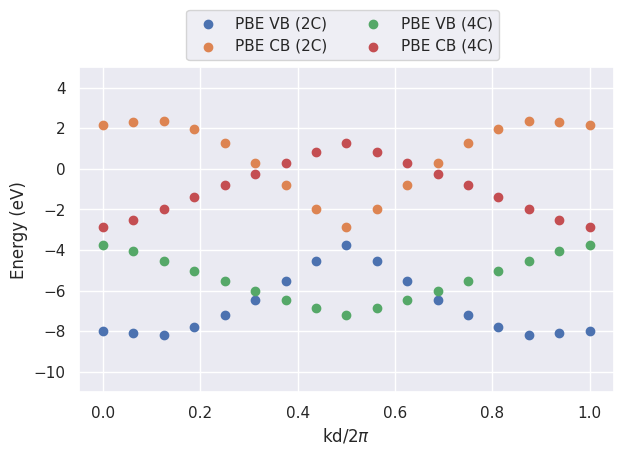

In [42]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "PBE"
per = PeriodicData(f"logs/periodic_{fnal}_frag2C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2C)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2C)")

fnal = "PBE"
per = PeriodicData(f"logs/periodic_{fnal}_frag4C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4C)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4C)")

plt.legend(bbox_to_anchor=(0.8,1.2),ncols=2)
plt.ylim(-11,5)
plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig(f"figures/pa32c_{fnal}_band_structures.png",dpi=500)

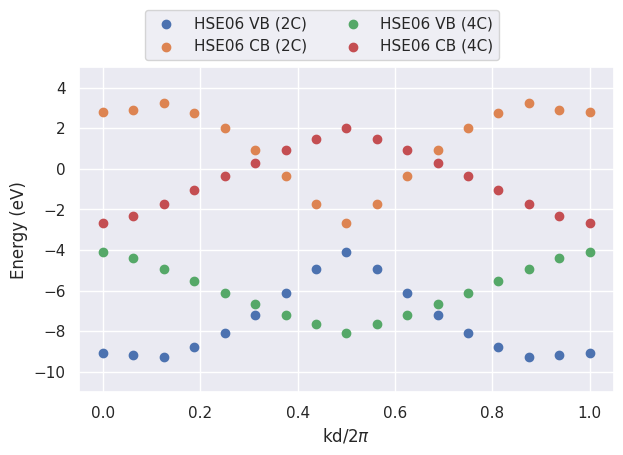

In [44]:
from tools.util import LASdata, DMRGdata, PeriodicData
fnal = "HSE06"
per = PeriodicData(f"logs/periodic_{fnal}_frag2C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (2C)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (2C)")

per = PeriodicData(f"logs/periodic_{fnal}_frag4C_24_k16.csv")
e,k = per.get_homo()
plt.scatter(k,e,label=f"{fnal} VB (4C)")
e,k = per.get_lumo()
plt.scatter(k,e,label=f"{fnal} CB (4C)")

plt.legend(bbox_to_anchor=(0.8,1.2),ncols=2)
plt.ylim(-11,5)
plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.tight_layout()
plt.savefig(f"figures/pa32c_{fnal}_band_structures.png",dpi=500)

## Hamiltonian Structure

[-4894.4  -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11
 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11
 -4894.11 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27
 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27
 -4894.27]


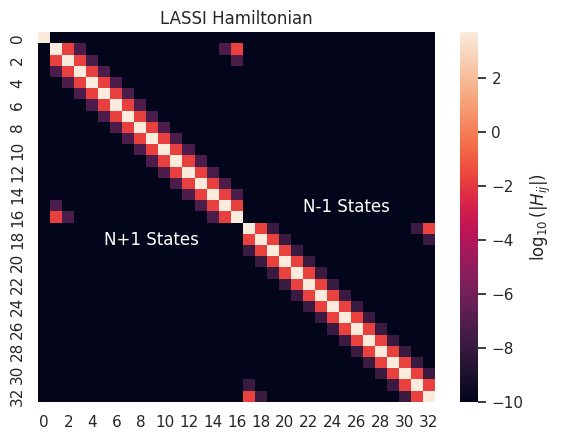

In [9]:
las = LASdata(pkl_fn=f"logs/pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
las.plot_h(pdft=False)
plt.annotate("N+1 States",(5.5,19),c="white")
plt.annotate("N-1 States",(22,16),c="white")
plt.title("LASSI Hamiltonian")
plt.savefig("figures/c64H.png",dpi=500)

[-4918.28 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09
 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09 -4918.09
 -4918.09 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36
 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36 -4918.36
 -4918.36]


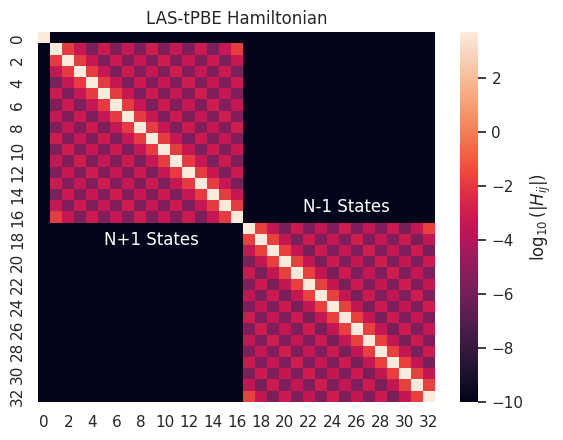

In [11]:
las = LASdata(pkl_fn=f"logs/pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
las.plot_h(pdft=True)
plt.annotate("N+1 States",(5.5,19),c="white")
plt.annotate("N-1 States",(22,16),c="white")
plt.title("LAS-tPBE Hamiltonian")
plt.savefig("figures/c64H_pdft.png",dpi=500)

[-4894.4  -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11
 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11 -4894.11
 -4894.11 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27
 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27 -4894.27
 -4894.27]


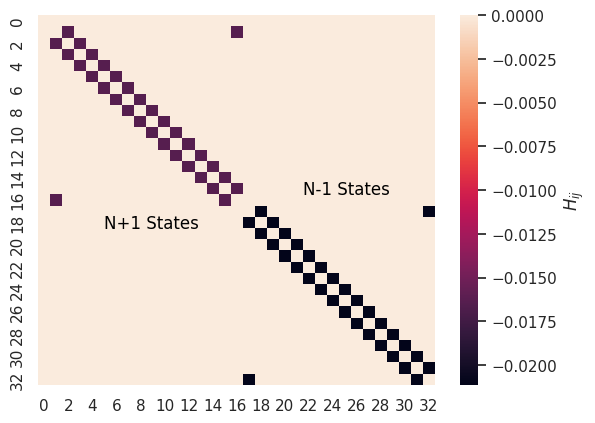

In [40]:
las = LASdata(pkl_fn=f"logs/pa64_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
las.plot_h(pdft=False,nodiag=True)
plt.annotate("N+1 States",(5.5,19),c="black")
plt.annotate("N-1 States",(22,16),c="black")
plt.savefig("figures/c64H_nodiag.png",dpi=500)

## Perturb then Diagonalize

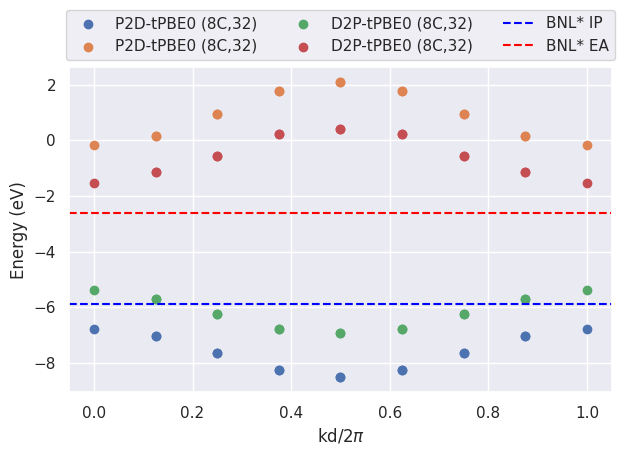

In [23]:
## Perturb then Diagonalize
cpf = 4
from tools.util import LASdata, DMRGdata, PeriodicData

las = LASdata(pkl_fn=f"logs/pa32_frag{cpf}_dist24_lsipdft_B.pkl",pct_pdft=0.75)
e,k = las.get_homo()
plt.scatter(k,e,label=f"P2D-tPBE0 ({cpf*2}C,32)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"P2D-tPBE0 ({cpf*2}C,32)")

las = LASdata(pkl_fn=f"logs/pa32_frag{cpf}_dist24_lsipdft.pkl",pct_pdft=0.75)
e,k = las.get_homo()
plt.scatter(k,e,label=f"D2P-tPBE0 ({cpf*2}C,32)")
e,k = las.get_lumo()
plt.scatter(k,e,label=f"D2P-tPBE0 ({cpf*2}C,32)")

plt.axhline(-5.87,linestyle="--",color="blue",label="BNL* IP")
plt.axhline(-2.60,linestyle="--",color="red",label="BNL* EA")

plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.legend(bbox_to_anchor=(1.02,1.2),ncols=3)
plt.tight_layout()
plt.savefig("figures/p2d_d2p_comp.png")

In [26]:
from tools.util import LASdata, DMRGdata, PeriodicData
import pandas as pd
df = pd.DataFrame()

las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["D2P-tPBE0 (8C,16)","IP"] = las.ip()
df.loc["D2P-tPBE0 (8C,16)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft.pkl",pct_pdft=0.75)
df.loc["D2P-tPBE0 (8C,32)","IP"] = las.ip()
df.loc["D2P-tPBE0 (8C,32)","EA"] = las.ea()

las = LASdata(pkl_fn="logs/pa16_frag4_dist24_lsipdft_B.pkl",pct_pdft=0.75)
df.loc["P2D-tPBE0 (8C,16)","IP"] = las.ip()
df.loc["P2D-tPBE0 (8C,16)","EA"] = las.ea()
las = LASdata(pkl_fn="logs/pa32_frag4_dist24_lsipdft_B.pkl",pct_pdft=0.75)
df.loc["P2D-tPBE0 (8C,32)","IP"] = las.ip()
df.loc["P2D-tPBE0 (8C,32)","EA"] = las.ea()

df["GAP"] = df["IP"] - df["EA"]
df = df.T
df = np.round(df,2)
df

,"D2P-tPBE0 (8C,16)","D2P-tPBE0 (8C,32)","P2D-tPBE0 (8C,16)","P2D-tPBE0 (8C,32)"
IP,5.92,5.39,6.89,6.76
EA,1.02,1.53,0.07,0.17
GAP,4.90,3.87,6.82,6.59


In [28]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  D2P-tPBE0 (8C,16) &  D2P-tPBE0 (8C,32) &  P2D-tPBE0 (8C,16) &  P2D-tPBE0 (8C,32) \\
\midrule
IP  &               5.92 &               5.39 &               6.89 &               6.76 \\
EA  &               1.02 &               1.53 &               0.07 &               0.17 \\
GAP &               4.90 &               3.87 &               6.82 &               6.59 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2304347/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())
